In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import nltk
from nltk.stem.porter import PorterStemmer
from wordcloud import wordcloud  
from wordcloud import STOPWORDS

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english') + ['of','the','to','be','that','with','on','for','by','at','one']

In [5]:
df_fake=pd.read_csv("fake.csv")
df_fake

C:\Users\Hello\AppData\Local\Temp\ipykernel_13864\3014790158.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fake=pd.read_csv("fake.csv")


title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23497  McPain: John McCain Furious That Iran Treated ...   
23498  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23499  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23500  How to Blow $700 Million: Al Jazeera America F...   
23501  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23497  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23498  21st Century Wire says It s a familiar theme. ...  Middle-east   
23499  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23500  21st Century Wire says Al Jazeera America will...  Middle-east   
23501  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0      December 31, 2017        NaN        NaN        NaN        NaN   
1      December 31, 2017        NaN        NaN        NaN        NaN   
2      December 30, 2017        NaN        NaN        NaN        NaN   
3      December 29, 2017        NaN        NaN        NaN        NaN   
4      December 25, 2017        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
23497   January 16, 2016        NaN        NaN        NaN        NaN   
23498   January 16, 2016        NaN        NaN        NaN        NaN   
23499   January 15, 2016        NaN        NaN        NaN        NaN   
23500   January 14, 2016        NaN        NaN        NaN        NaN   
23501   January 12, 2016        NaN        NaN        NaN        NaN   

      Unnamed: 8 Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164  \
0            NaN        NaN  ...          NaN          NaN          NaN   
1            NaN        NaN  ...          NaN          NaN          NaN   
2            NaN        NaN  ...          NaN          NaN          NaN   
3            NaN        NaN  ...          NaN          NaN          NaN   
4            NaN        NaN  ...          NaN          NaN          NaN   
...          ...        ...  ...          ...          ...          ...   
23497        NaN        NaN  ...          NaN          NaN          NaN   
23498        NaN        NaN  ...          NaN          NaN          NaN   
23499        NaN        NaN  ...          NaN          NaN          NaN   
23500        NaN        NaN  ...          NaN          NaN          NaN   
23501        NaN        NaN  ...          NaN          NaN          NaN   

      Unnamed: 165 Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
23497          NaN          NaN          NaN          NaN          NaN   
23498          NaN          NaN          NaN          NaN          NaN   
23499          NaN   

In [6]:
df_true=pd.read_csv("true.csv")
df_true

title  \
0      As U.S. budget fight looms, Republicans flip t...   
1      U.S. military to accept transgender recruits o...   
2      Senior U.S. Republican senator: 'Let Mr. Muell...   
3      FBI Russia probe helped by Australian diplomat...   
4      Trump wants Postal Service to charge 'much mor...   
...                                                  ...   
21412  'Fully committed' NATO backs new U.S. approach...   
21413  LexisNexis withdrew two products from Chinese ...   
21414  Minsk cultural hub becomes haven from authorities   
21415  Vatican upbeat on possibility of Pope Francis ...   
21416  Indonesia to buy $1.14 billion worth of Russia...   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 4 columns]

In [7]:
print(df_fake.shape)

(23502, 172)


In [8]:
print(df_true.shape)

(21417, 4)


In [9]:
df_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
1  December 31, 2017        NaN        NaN        NaN        NaN        NaN   
2  December 30, 2017        NaN        NaN        NaN        NaN        NaN   
3  December 29, 2017        NaN        NaN        NaN        NaN        NaN   
4  December 25, 2017        NaN        NaN        NaN        NaN        NaN   

  Unnamed: 9  ... Unnamed: 162 Unnamed: 163 Unnamed: 164 Unnamed: 165  \
0        NaN  ...          NaN          NaN          NaN          NaN   
1        NaN  ...          NaN          NaN          NaN          NaN   
2        NaN  ...          NaN          NaN          NaN          NaN   
3        NaN  ...          NaN          NaN          NaN          NaN   
4        NaN  ...          NaN          NaN          NaN          NaN   

  Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

  Unnamed: 171  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 172 columns]

In [10]:
df_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [11]:
df_fake.insert(1,'fake/true','fake')

In [12]:
df_true.insert(1,'fake/true','true')

In [13]:
df=df_true.append(df_fake)

C:\Users\Hello\AppData\Local\Temp\ipykernel_13864\4125155427.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_true.append(df_fake)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 23501
Columns: 173 entries, title to Unnamed: 171
dtypes: object(173)
memory usage: 59.6+ MB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44919 entries, 0 to 23501
Columns: 173 entries, title to Unnamed: 171
dtypes: object(173)
memory usage: 59.6+ MB


In [16]:
df['fake/true'].value_counts()

fake    23502
true    21417
Name: fake/true, dtype: int64

In [17]:
df['subject'].value_counts()

politicsNews                                                                                                                                                                                                                                                                                    11272
worldnews                                                                                                                                                                                                                                                                                       10145
News                                                                                                                                                                                                                                                                                             9050
politics                                                                                                              

In [18]:
df=df.drop(columns=['title','date'],axis=1)

In [19]:
df

fake/true                                               text  \
0          true  WASHINGTON (Reuters) - The head of a conservat...   
1          true  WASHINGTON (Reuters) - Transgender people will...   
2          true  WASHINGTON (Reuters) - The special counsel inv...   
3          true  WASHINGTON (Reuters) - Trump campaign adviser ...   
4          true  SEATTLE/WASHINGTON (Reuters) - President Donal...   
...         ...                                                ...   
23497      fake  21st Century Wire says As 21WIRE reported earl...   
23498      fake  21st Century Wire says It s a familiar theme. ...   
23499      fake  Patrick Henningsen  21st Century WireRemember ...   
23500      fake  21st Century Wire says Al Jazeera America will...   
23501      fake  21st Century Wire says As 21WIRE predicted in ...   

            subject Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0      politicsNews        NaN        NaN        NaN        NaN        NaN   
1      politicsNews        NaN        NaN        NaN        NaN        NaN   
2      politicsNews        NaN        NaN        NaN        NaN        NaN   
3      politicsNews        NaN        NaN        NaN        NaN        NaN   
4      politicsNews        NaN        NaN        NaN        NaN        NaN   
...             ...        ...        ...        ...        ...        ...   
23497   Middle-east        NaN        NaN        NaN        NaN        NaN   
23498   Middle-east        NaN        NaN        NaN        NaN        NaN   
23499   Middle-east        NaN        NaN        NaN        NaN        NaN   
23500   Middle-east        NaN        NaN        NaN        NaN        NaN   
23501   Middle-east        NaN        NaN        NaN        NaN        NaN   

      Unnamed: 9 Unnamed: 10  ... Unnamed: 162 Unnamed: 163 Unnamed: 164  \
0            NaN         NaN  ...          NaN          NaN          NaN   
1            NaN         NaN  ...          NaN          NaN          NaN   
2            NaN         NaN  ...          NaN          NaN          NaN   
3            NaN         NaN  ...          NaN          NaN          NaN   
4            NaN         NaN  ...          NaN          NaN          NaN   
...          ...         ...  ...          ...          ...          ...   
23497        NaN         NaN  ...          NaN          NaN          NaN   
23498        NaN         NaN  ...          NaN          NaN          NaN   
23499        NaN         NaN  ...          NaN          NaN          NaN   
23500        NaN         NaN  ...          NaN          NaN          NaN   
23501        NaN         NaN  ...          NaN          NaN          NaN   

      Unnamed: 165 Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
23497          NaN          NaN          NaN          NaN          NaN   
23498          NaN          NaN          NaN          NaN          NaN   
23499          NaN          NaN          NaN          NaN          NaN   
23500          NaN          NaN          NaN          NaN          NaN   
23501          NaN          NaN          NaN          NaN          NaN   

      Unnamed: 170 Unnamed: 171  
0              NaN          NaN  
1              NaN          NaN  
2              NaN          NaN  
3              NaN          NaN  
4              NaN          NaN  
...            ...          ...  
23497          NaN          NaN  
23498          NaN          NaN  
23499          NaN          NaN  
23500          NaN          NaN  
23501          NaN          NaN  

[44919 rows x 171

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


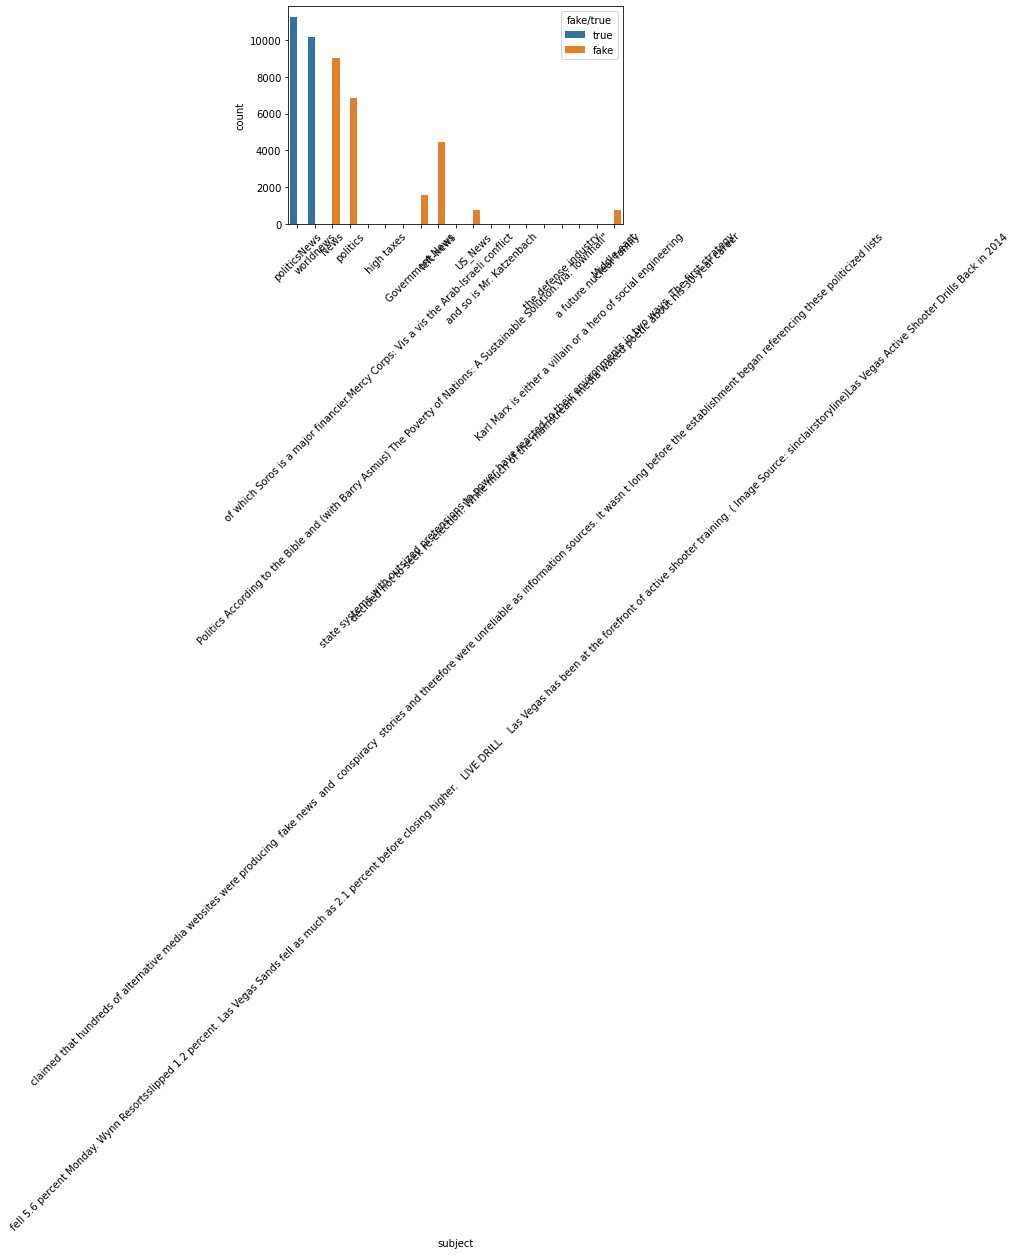

In [20]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['subject'],hue='fake/true',data=df)
plt.xticks(rotation=45);

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


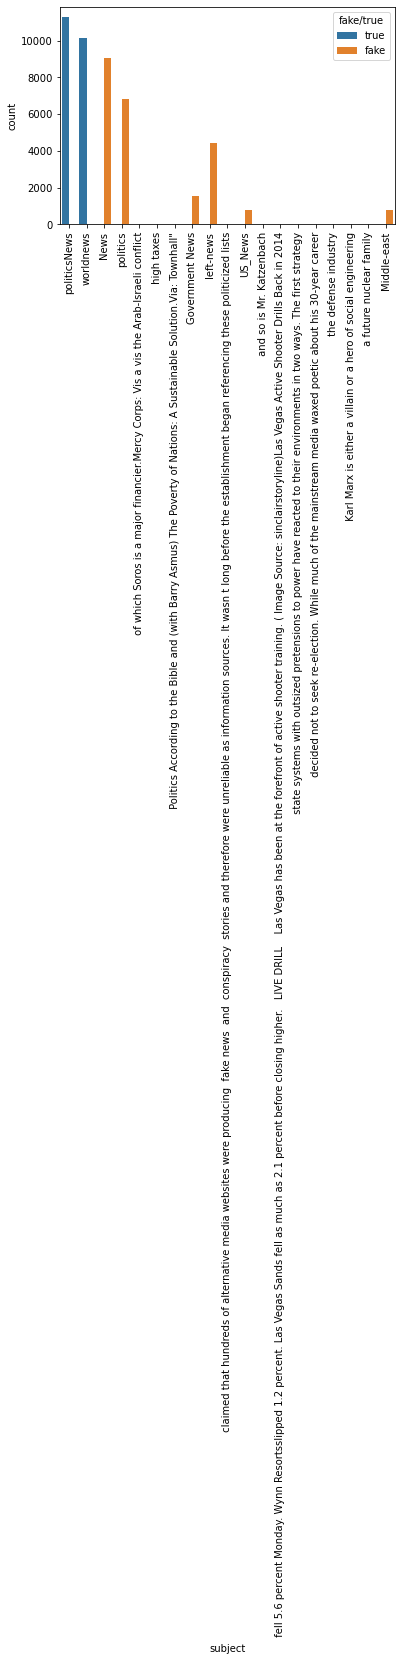

In [21]:

sns.countplot(df['subject'],hue='fake/true',data=df)
plt.xticks(rotation=90);

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


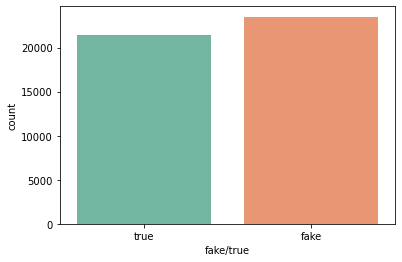

In [22]:
sns.countplot(df['fake/true'],data=df,palette='Set2');


In [23]:
import plotly.express as px

fig = px.pie(df, names = "subject", title = "News Subject", hole = 0.5,
            width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.2, color = "#000000")))

In [24]:
df_fake



title fake/true  \
0       Donald Trump Sends Out Embarrassing New Year’...      fake   
1       Drunk Bragging Trump Staffer Started Russian ...      fake   
2       Sheriff David Clarke Becomes An Internet Joke...      fake   
3       Trump Is So Obsessed He Even Has Obama’s Name...      fake   
4       Pope Francis Just Called Out Donald Trump Dur...      fake   
...                                                  ...       ...   
23497  McPain: John McCain Furious That Iran Treated ...      fake   
23498  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      fake   
23499  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      fake   
23500  How to Blow $700 Million: Al Jazeera America F...      fake   
23501  10 U.S. Navy Sailors Held by Iranian Military ...      fake   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...         News   
3      On Christmas day, Donald Trump announced that ...         News   
4      Pope Francis used his annual Christmas Day mes...         News   
...                                                  ...          ...   
23497  21st Century Wire says As 21WIRE reported earl...  Middle-east   
23498  21st Century Wire says It s a familiar theme. ...  Middle-east   
23499  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
23500  21st Century Wire says Al Jazeera America will...  Middle-east   
23501  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                    date Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0      December 31, 2017        NaN        NaN        NaN        NaN   
1      December 31, 2017        NaN        NaN        NaN        NaN   
2      December 30, 2017        NaN        NaN        NaN        NaN   
3      December 29, 2017        NaN        NaN        NaN        NaN   
4      December 25, 2017        NaN        NaN        NaN        NaN   
...                  ...        ...        ...        ...        ...   
23497   January 16, 2016        NaN        NaN        NaN        NaN   
23498   January 16, 2016        NaN        NaN        NaN        NaN   
23499   January 15, 2016        NaN        NaN        NaN        NaN   
23500   January 14, 2016        NaN        NaN        NaN        NaN   
23501   January 12, 2016        NaN        NaN        NaN        NaN   

      Unnamed: 8  ... Unnamed: 162 Unnamed: 163 Unnamed: 164 Unnamed: 165  \
0            NaN  ...          NaN          NaN          NaN          NaN   
1            NaN  ...          NaN          NaN          NaN          NaN   
2            NaN  ...          NaN          NaN          NaN          NaN   
3            NaN  ...          NaN          NaN          NaN          NaN   
4            NaN  ...          NaN          NaN          NaN          NaN   
...          ...  ...          ...          ...          ...          ...   
23497        NaN  ...          NaN          NaN          NaN          NaN   
23498        NaN  ...          NaN          NaN          NaN          NaN   
23499        NaN  ...          NaN          NaN          NaN          NaN   
23500        NaN  ...          NaN          NaN          NaN          NaN   
23501        NaN  ...          NaN          NaN          NaN          NaN   

      Unnamed: 166 Unnamed: 167 Unnamed: 168 Unnamed: 169 Unnamed: 170  \
0              NaN          NaN          NaN          NaN          NaN   
1              NaN          NaN          NaN          NaN          NaN   
2              NaN          NaN          NaN          NaN          NaN   
3              NaN          NaN          NaN          NaN          NaN   
4              NaN          NaN          NaN          NaN          NaN   
...            ...          ...          ...          ...          ...   
23497          NaN       

In [25]:
df_fake.columns

Index(['title', 'fake/true', 'text', 'subject', 'date', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       ...
       'Unnamed: 162', 'Unnamed: 163', 'Unnamed: 164', 'Unnamed: 165',
       'Unnamed: 166', 'Unnamed: 167', 'Unnamed: 168', 'Unnamed: 169',
       'Unnamed: 170', 'Unnamed: 171'],
      dtype='object', length=173)

<AxesSubplot:xlabel='subject', ylabel='count'>

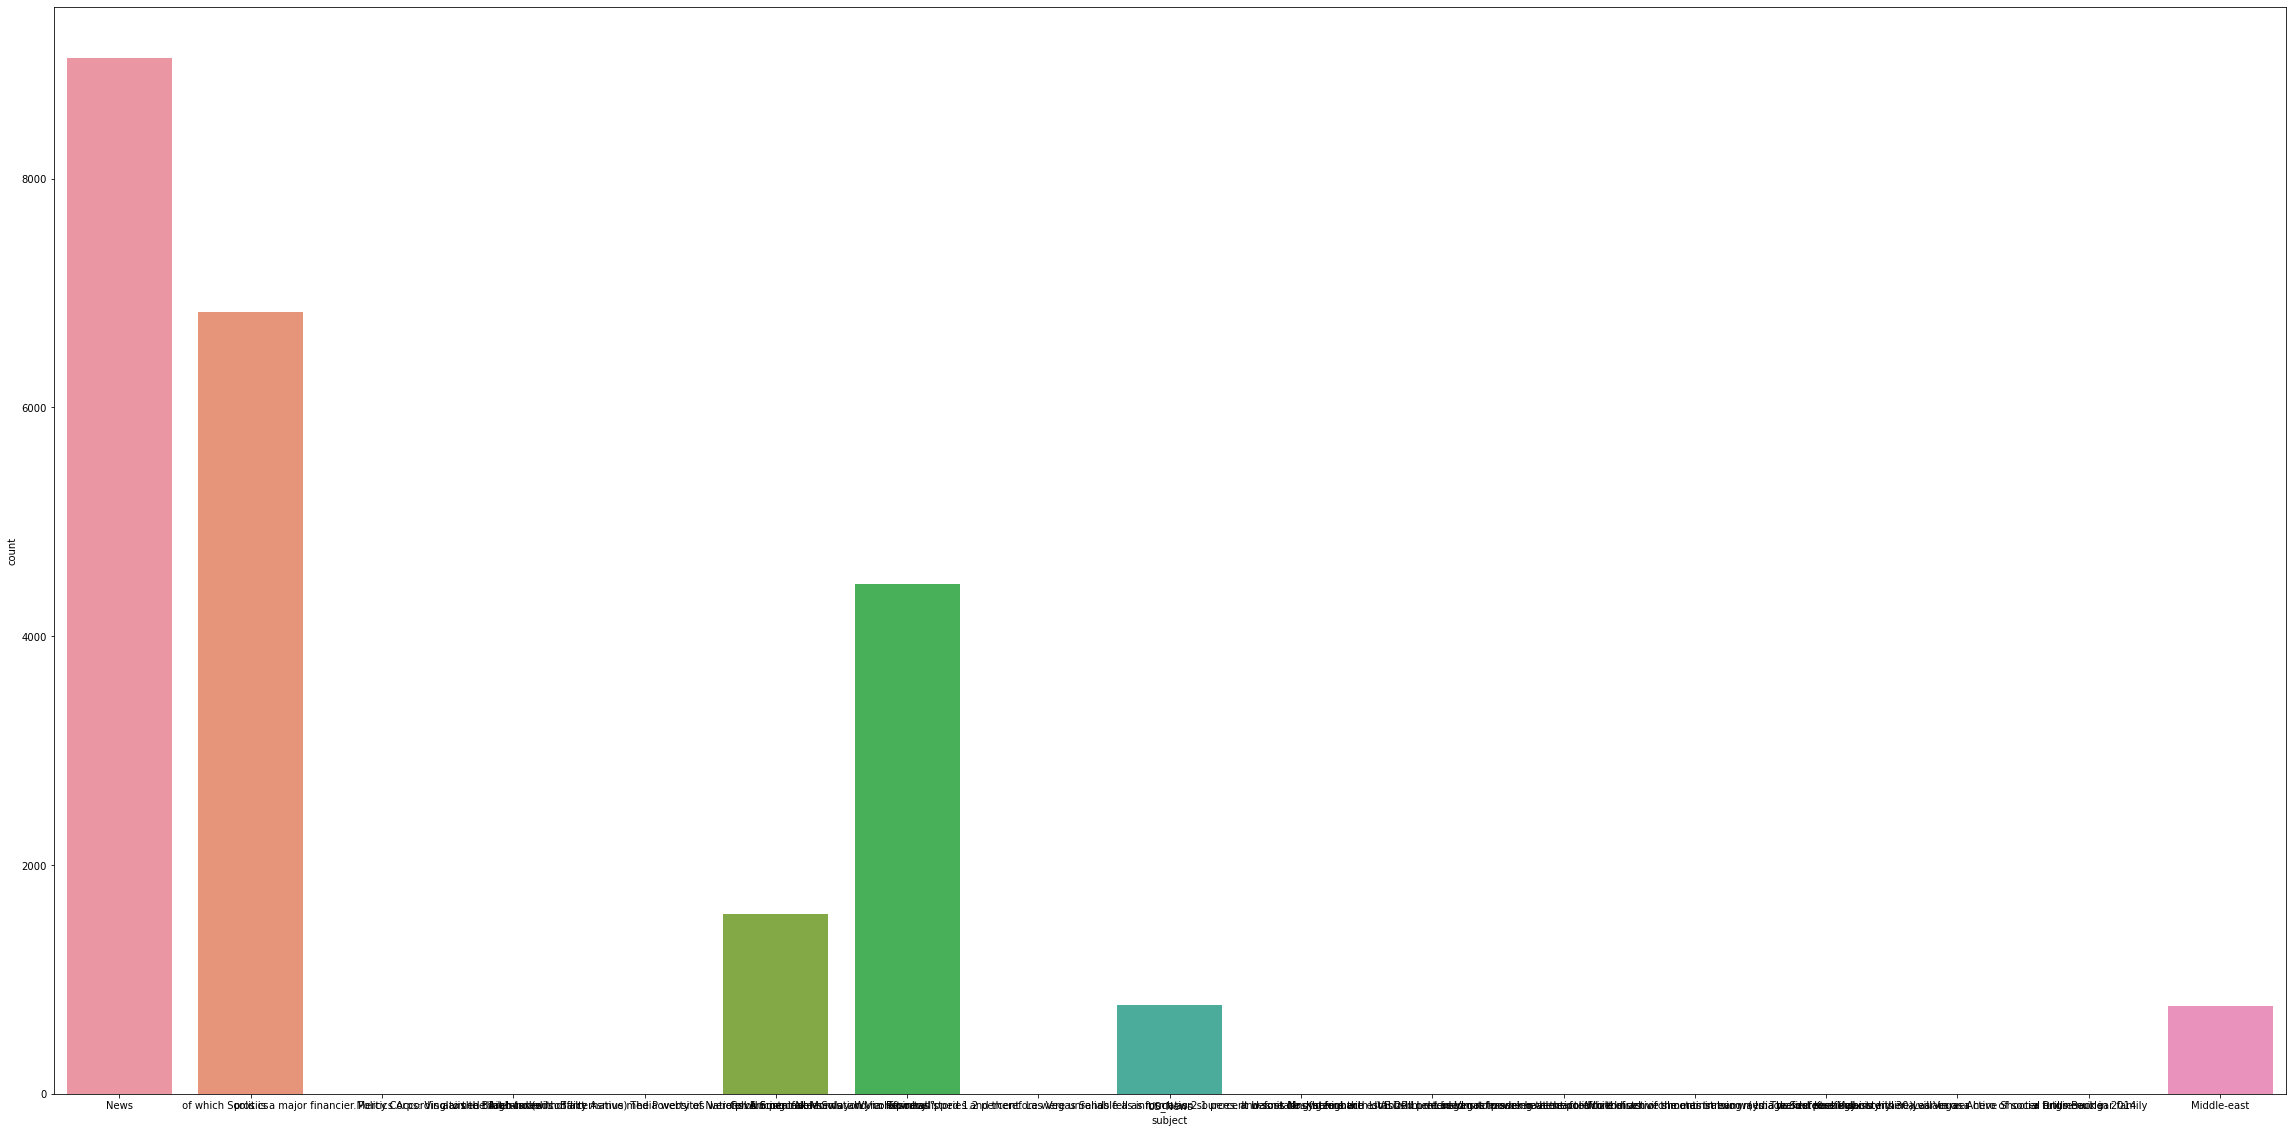

In [26]:

plt.figure(figsize=(40,20))
sns.countplot(x ='subject',data=df_fake)

C:\Users\Hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



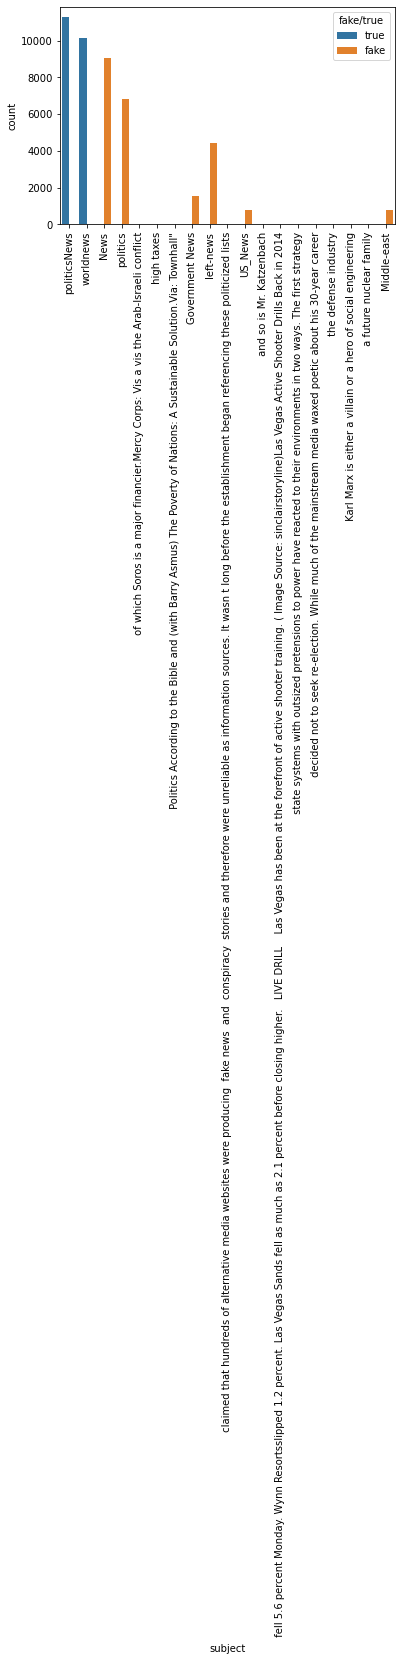

In [27]:
sns.countplot(df['subject'],hue='fake/true',data=df)
plt.xticks(rotation=90);

In [28]:
#wordcloud()
df_fake['text'].tolist()

['Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t e

In [29]:
type(df_fake['text'].tolist())

list

In [30]:
text=' '.join(df_fake['text'].tolist())


In [32]:
' '.join(["this","is","data"])

'this is data'

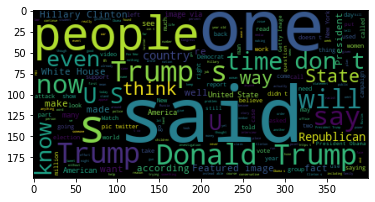

In [34]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)

In [35]:
df_true

title fake/true  \
0      As U.S. budget fight looms, Republicans flip t...      true   
1      U.S. military to accept transgender recruits o...      true   
2      Senior U.S. Republican senator: 'Let Mr. Muell...      true   
3      FBI Russia probe helped by Australian diplomat...      true   
4      Trump wants Postal Service to charge 'much mor...      true   
...                                                  ...       ...   
21412  'Fully committed' NATO backs new U.S. approach...      true   
21413  LexisNexis withdrew two products from Chinese ...      true   
21414  Minsk cultural hub becomes haven from authorities      true   
21415  Vatican upbeat on possibility of Pope Francis ...      true   
21416  Indonesia to buy $1.14 billion worth of Russia...      true   

                                                    text       subject  \
0      WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1      WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2      WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3      WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4      SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   
...                                                  ...           ...   
21412  BRUSSELS (Reuters) - NATO allies on Tuesday we...     worldnews   
21413  LONDON (Reuters) - LexisNexis, a provider of l...     worldnews   
21414  MINSK (Reuters) - In the shadow of disused Sov...     worldnews   
21415  MOSCOW (Reuters) - Vatican Secretary of State ...     worldnews   
21416  JAKARTA (Reuters) - Indonesia will buy 11 Sukh...     worldnews   

                     date  
0      December 31, 2017   
1      December 29, 2017   
2      December 31, 2017   
3      December 30, 2017   
4      December 29, 2017   
...                   ...  
21412    August 22, 2017   
21413    August 22, 2017   
21414    August 22, 2017   
21415    August 22, 2017   
21416    August 22, 2017   

[21417 rows x 5 columns]

In [41]:
text=' '.join(df_true['text'].tolist())


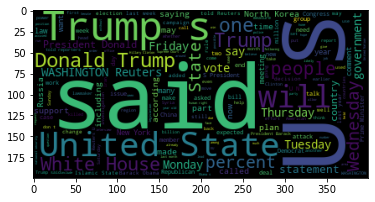

In [42]:

# wordcloud=WordCloud().generate(text)


# plt.imshow(wordcloud)

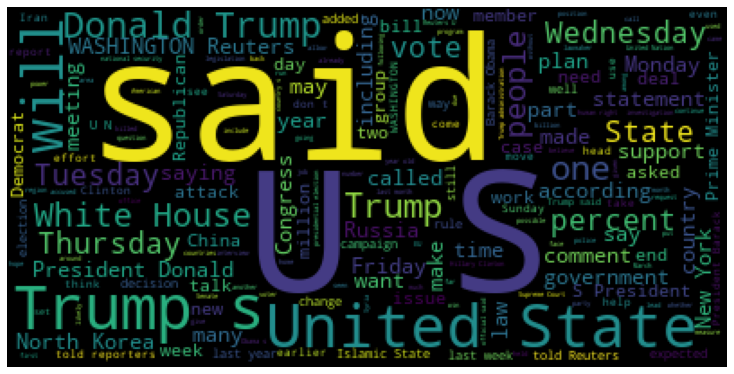

In [81]:

wordcloud=WordCloud().generate(text)

fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

difference in text
#  real news seems to have source of publication which is not  present in fake news set
looking at thre data
.most of text contains recters information such as "washington (recuters)"
.some text are tweets from twitter
.few text do not contain any publication info

cleaning data
.
text can be splitted only at* _*  which is always present after mentioning source of publoication source of publication , this gives us publication part and text part
 if we do not get text part this means publication details was't given for 
  the  twitter tweets always have same source a long text of max 259 character   

In [82]:
df['label']=df['fake/true'].map({"fake":0,"true":1})
df['label']

0        1
1        1
2        1
3        1
4        1
        ..
23497    0
23498    0
23499    0
23500    0
23501    0
Name: label, Length: 44919, dtype: int64

In [83]:
X=df['text'].values
y=df['label'].values


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(stop_words='english')
vect

CountVectorizer(stop_words='english')

In [85]:
x=vect.fit_transform(X)


In [86]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,random_state=42,test_size=.15)

In [87]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [88]:
mb=MultinomialNB()


In [89]:
mb.fit(x_train,y_train)


MultinomialNB()

In [90]:
prediction=mb.predict(x_test)


In [91]:
accuracy_score(y_test,prediction)


0.9513208667260314

In [92]:
from sklearn.tree import DecisionTreeClassifier


In [93]:
d=DecisionTreeClassifier()
d

DecisionTreeClassifier()

In [94]:
prediction2=d.fit(x_train,y_train).predict(x_test)


In [95]:
accuracy_score(y_test,prediction2)


0.9952508162659542